#**Step 01: Clone the YOLOv9 Github Repo**

In [1]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...


#**Step 02: Change Current Directory**

In [2]:
%cd yolov9

c:\Users\M\Documents\GitHub\DL_study\objectdetection\yolov9


C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


#**Step 03: Install All the Required Packages**

In [3]:
!pip install -r requirements.txt -q

#**Step 04: Download the Model Weights**

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [4]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\M\Documents\GitHub\DL_study\objectdetection\yolov9


In [5]:
!mkdir -p {HOME}/weights

���� ������ �ùٸ��� �ʽ��ϴ�.


In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [7]:
!ls -la {HOME}/weights

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


#**Step 05: Download the Dataset from Roboflow**

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")


   ---------------------------------------- 0.0/76.7 kB ? eta -:--:--
   ---------------------------------------- 76.7/76.7 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/178.7 kB ? eta -:--:--
   ---------------------------------------- 178.7/178.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/54.5 kB ? eta -:--:--
   ---------------------------------------- 54.5/54.5 kB 2.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov9:: 100%|██████████| 6472/6472 [00:07<00:00, 847.58it/s] 


In [ ]:
# 위의 코드는 Roboflow API를 사용하여 특정 프로젝트의 데이터셋을 다운로드하는 과정입니다. 코드의 각 부분을 하나씩 설명하겠습니다.

# 라이브러리 설치:

# python
# 코드 복사
# !pip install roboflow
# 이 코드는 Roboflow 라이브러리를 설치합니다. Roboflow는 컴퓨터 비전 모델을 쉽게 관리하고 배포할 수 있는 플랫폼입니다.

# Roboflow 라이브러리 임포트:

# python
# 코드 복사
# from roboflow import Roboflow
# 설치한 Roboflow 라이브러리를 코드에서 사용할 수 있도록 임포트합니다.

# Roboflow API 키를 사용하여 인스턴스 생성:

# python
# 코드 복사
# rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
# Roboflow API 키를 사용하여 Roboflow 객체를 생성합니다. 이 API 키는 사용자의 계정과 관련된 권한을 제공합니다.

# 프로젝트 및 버전 정보 설정:

# python
# 코드 복사
# project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
# version = project.version(2)
# rf.workspace("project-uyrxf"): 지정된 워크스페이스에 접근합니다.
# .project("ppe_detection-v1x3l"): 해당 워크스페이스 내의 특정 프로젝트에 접근합니다.
# .version(2): 프로젝트의 특정 버전을 선택합니다. 여기서는 2번째 버전을 선택합니다.
# 데이터셋 다운로드:

# python
# 코드 복사
# dataset = version.download("yolov9")
# 선택한 버전의 데이터셋을 다운로드합니다. "yolov9"은 다운로드할 데이터셋의 형식을 지정합니다. 여기서는 YOLOv9 형식으로 데이터셋을 다운로드합니다.

In [10]:
pwd

'c:\\Users\\M\\Documents\\GitHub\\DL_study\\objectdetection\\yolov9'

#**Step 06: Train Custom Model**

In [12]:
cd ..

c:\Users\M\Documents\GitHub\DL_study\objectdetection


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


In [13]:
%cd yolov9

c:\Users\M\Documents\GitHub\DL_study\objectdetection\yolov9


In [16]:
!pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 52.2 MB/s eta 0:00:00


In [18]:
!pip uninstall torch
!pip install torch

In [17]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data 'PPE_Detection-2/data.yaml' --img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 10 --close-mosaic 15


# --workers 8: 데이터 로딩을 위한 워커 수를 8로 설정합니다. 이는 데이터 로딩 속도를 높이기 위해 병렬 처리를 사용하는 것입니다.
# --device 0: 학습에 사용할 디바이스를 지정합니다. 여기서는 첫 번째 GPU(디바이스 0)를 사용합니다.
# --batch 8: 배치 크기를 8로 설정합니다. 이는 한 번에 학습할 이미지의 수를 의미합니다.
# --data 'PPE_Detection-2/data.yaml': 학습에 사용할 데이터셋의 구성 파일을 지정합니다. 이 파일에는 학습, 검증, 테스트 데이터셋의 경로와 클래스 정보 등이 포함되어 있습니다.
# --img 640: 학습에 사용할 이미지의 크기를 640x640으로 설정합니다.
# --cfg models/detect/yolov9-e.yaml: 모델의 구성을 정의한 YAML 파일을 지정합니다. 이 파일에는 네트워크의 레이어와 기타 설정이 포함되어 있습니다.
# --weights '{HOME}/weights/yolov9-e.pt': 학습에 사용할 사전 학습된 가중치 파일을 지정합니다. {HOME}은 홈 디렉토리를 의미하며, 해당 위치에 있는 yolov9-e.pt 파일을 사용합니다.
# --name yolov9-e-finetuning: 학습 결과를 저장할 디렉토리 이름을 지정합니다. 여기서는 yolov9-e-finetuning이라는 이름으로 저장됩니다.
# --hyp hyp.scratch-high.yaml: 학습 하이퍼파라미터를 정의한 YAML 파일을 지정합니다. 이 파일에는 학습률, 가중치 감쇠, 데이터 증강 등 다양한 하이퍼파라미터 설정이 포함되어 있습니다.
# --min-items 0: 학습에 사용할 최소 항목 수를 0으로 설정합니다.
# --epochs 30: 학습을 30 에폭(epoch) 동안 수행합니다. 한 에폭은 전체 데이터셋을 한 번 학습하는 것을 의미합니다.
# --close-mosaic 15: 모자이크 데이터 증강을 15 에폭 후에 종료합니다. 모자이크는 여러 이미지를 합쳐서 새로운 이미지를 만드는 데이터 증강 기법입니다.

Traceback (most recent call last):
  File "c:\Users\M\Documents\GitHub\DL_study\objectdetection\yolov9\train_dual.py", line 12, in <module>
    import torch
  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py", line 148, in <module>
    raise err
OSError: [WinError 126] 지정된 모듈을 찾을 수 없습니다. Error loading "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.


In [ ]:
# --workers 8
# --workers 옵션은 데이터 로딩을 위한 워커(worker) 프로세스의 수를 지정합니다. 이 옵션은 데이터 로딩 속도를 높이기 위해 병렬 처리를 사용합니다. 데이터 로딩 워커는 학습 과정에서 데이터를 준비하는 역할을 합니다. 더 많은 워커를 사용하면 데이터 로딩 속도가 빨라질 수 있으며, GPU가 데이터를 기다리지 않고 연속적으로 학습할 수 있도록 도와줍니다.

# 병렬 처리: 여러 개의 워커 프로세스가 동시에 데이터를 로딩하므로, 데이터를 로딩하는 시간을 줄일 수 있습니다.
# 효율성 향상: 특히 대규모 데이터셋이나 복잡한 데이터 전처리를 수행할 때 유용합니다.
# 하드웨어 의존성: 사용 가능한 CPU 코어 수에 따라 적절한 워커 수를 선택해야 합니다. 너무 많은 워커를 사용하면 오히려 시스템의 다른 작업이 느려질 수 있습니다.
# 예를 들어, 8개의 워커를 사용하면 8개의 프로세스가 동시에 데이터를 로딩하고 전처리하여 GPU에 전달하게 됩니다.

# --min-items 0
# --min-items 옵션은 학습에 사용할 최소 항목(데이터)의 수를 지정합니다. 이 옵션은 일반적으로 데이터셋의 특정 조건을 충족하는 최소 항목 수를 설정하는 데 사용됩니다. 예를 들어, 데이터셋에 있는 클래스별 최소 항목 수를 지정하여, 충분한 데이터가 있는 경우에만 학습에 포함되도록 할 수 있습니다.

# 데이터 필터링: 데이터셋에서 충분한 수의 항목이 있는 클래스나 조건을 충족하는 항목만을 포함하여 학습의 품질을 높일 수 있습니다.
# 학습 안정성: 데이터가 너무 적은 클래스나 항목은 학습에 부정적인 영향을 줄 수 있으므로, 이를 피할 수 있습니다.
# 이 예제에서는 --min-items 0으로 설정되어 있습니다. 이는 모든 항목을 포함하겠다는 의미입니다. 최소 항목 수를 0으로 설정하면, 데이터셋에 있는 모든 항목을 사용하게 됩니다.

# 요약
# --workers 8: 데이터 로딩을 위한 8개의 워커 프로세스를 사용하여 데이터 로딩 속도를 높입니다.
# --min-items 0: 모든 데이터를 학습에 포함시킵니다. 데이터셋에 있는 항목 수에 상관없이 모든 데이터를 사용하겠다는 의미입니다.

In [ ]:
# 초기 설정 및 환경 설정
# plaintext
# 코드 복사
# 2024-07-25 15:32:08.694035: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. ...
# 2024-07-25 15:32:08.745059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory...
# 2024-07-25 15:32:08.745117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory...
# 2024-07-25 15:32:08.746523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory...
# 2024-07-25 15:32:08.754379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions ...
# 2024-07-25 15:32:09.951801: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
# TensorFlow 관련 정보와 경고 메시지입니다. 주로 TensorFlow와 관련된 환경 설정에 대한 로그입니다. cuDNN, cuFFT, cuBLAS 등의 CUDA 관련 플러그인 등록 시도에 실패했다는 메시지와 TensorRT를 찾을 수 없다는 경고가 포함되어 있습니다.

# 학습 스크립트 실행
# plaintext
# 코드 복사
# train_dual: weights=/content/yolov9/weights/yolov9-e.pt, cfg=models/detect/yolov9-e.yaml, data=PPE_Detection-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=8, imgsz=640, ...
# YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
# train_dual.py 스크립트의 설정 정보를 출력합니다. 학습에 사용된 파라미터 값과 YOLO 모델 버전, Python 버전, Torch 버전, CUDA 디바이스 정보가 포함되어 있습니다.

# 하이퍼파라미터 설정
# plaintext
# 코드 복사
# hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, ...
# 학습에 사용된 하이퍼파라미터 값들을 출력합니다. 학습률, 모멘텀, 가중치 감쇠, 워밍업 에폭 등의 값들이 나열되어 있습니다.

# 데이터 로드 및 초기 설정
# plaintext
# 코드 복사
# train: Scanning /content/yolov9/PPE_Detection-2/train/labels.cache... 2271 images, 0 backgrounds, 0 corrupt...
# val: Scanning /content/yolov9/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt...
# 학습 및 검증 데이터셋을 스캔하여 이미지 수와 유효성을 확인합니다.

# 학습 시작
# plaintext
# 코드 복사
# Starting training for 10 epochs...
# 학습이 시작되었음을 알리는 메시지입니다.

# 학습 진행 상태 및 결과
# 각 에폭마다 학습 진행 상태와 검증 결과를 출력합니다. 예를 들어 첫 번째 에폭의 결과는 다음과 같습니다:

# plaintext
# 코드 복사
# Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
# 0/9      11.6G      2.257      5.384      2.513         69        640:   0% 0/284 [00:03<?, ?it/s]WARNING ⚠️ TensorBoard graph visualization failure ...
# 0/9      13.4G      1.829       2.63      1.867         97        640: 100% 284/284 [01:50<00:00,  2.57it/s]
# Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 40/40 [00:09<00:00,  4.06it/s]
# all        637       3064      0.731      0.606      0.657      0.409
# 각 에폭마다 GPU 메모리 사용량, 박스 손실(box_loss), 클래스 손실(cls_loss), DFL 손실(dfl_loss), 처리한 인스턴스 수와 이미지 크기 등의 정보를 출력합니다.
# 또한, 검증 데이터셋에서의 정확도(P), 재현율(R), mAP50, mAP50-95 등의 성능 지표를 출력합니다.

# 최종 결과 및 모델 저장
# plaintext
# 코드 복사
# 10 epochs completed in 0.293 hours.
# Optimizer stripped from runs/train/yolov9-e-finetuning3/weights/last.pt, 140.0MB
# Optimizer stripped from runs/train/yolov9-e-finetuning3/weights/best.pt, 140.0MB
# Validating runs/train/yolov9-e-finetuning3/weights/best.pt...
# 10 에폭의 학습이 완료되었음을 알리는 메시지입니다.
# 최종 모델 가중치를 저장하고, 최적의 가중치 파일(best.pt)을 사용하여 모델을 검증합니다.

# 최종 검증 결과
# plaintext
# 코드 복사
# Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 40/40 [00:12<00:00,  3.14it/s]
# all        637       3064      0.917       0.79      0.865      0.577
# Dust Mask        637        308      0.964      0.871      0.942      0.619
# Eye Wear        637        147      0.923      0.657      0.759      0.403
# Glove        637        631       0.97      0.868       0.94      0.655
# Protective Boots        637        608      0.981      0.932      0.987      0.683
# Protective Helmet        637        753      0.964       0.88      0.968      0.716
# Safety Vest        637        592      0.905       0.84      0.916      0.691
# Shield        637         25      0.709       0.48      0.544      0.275
# Results saved to runs/train/yolov9-e-finetuning3
# 검증 데이터셋에 대한 최종 성능 지표입니다. 각 클래스별로 P, R, mAP50, mAP50-95 값을 출력합니다.
# 검증 결과가 저장된 위치를 표시합니다 (runs/train/yolov9-e-finetuning3).

#**Download Weights From the Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t
To: /content/yolov9/best.pt
100% 140M/140M [00:00<00:00, 195MB/s]


##**Step 07: Examine Training Results**

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/runs/train/yolov9-e-finetuning3

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1721921531.72ae99703e7f.17397.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


In [ ]:
from IPython.display import Image

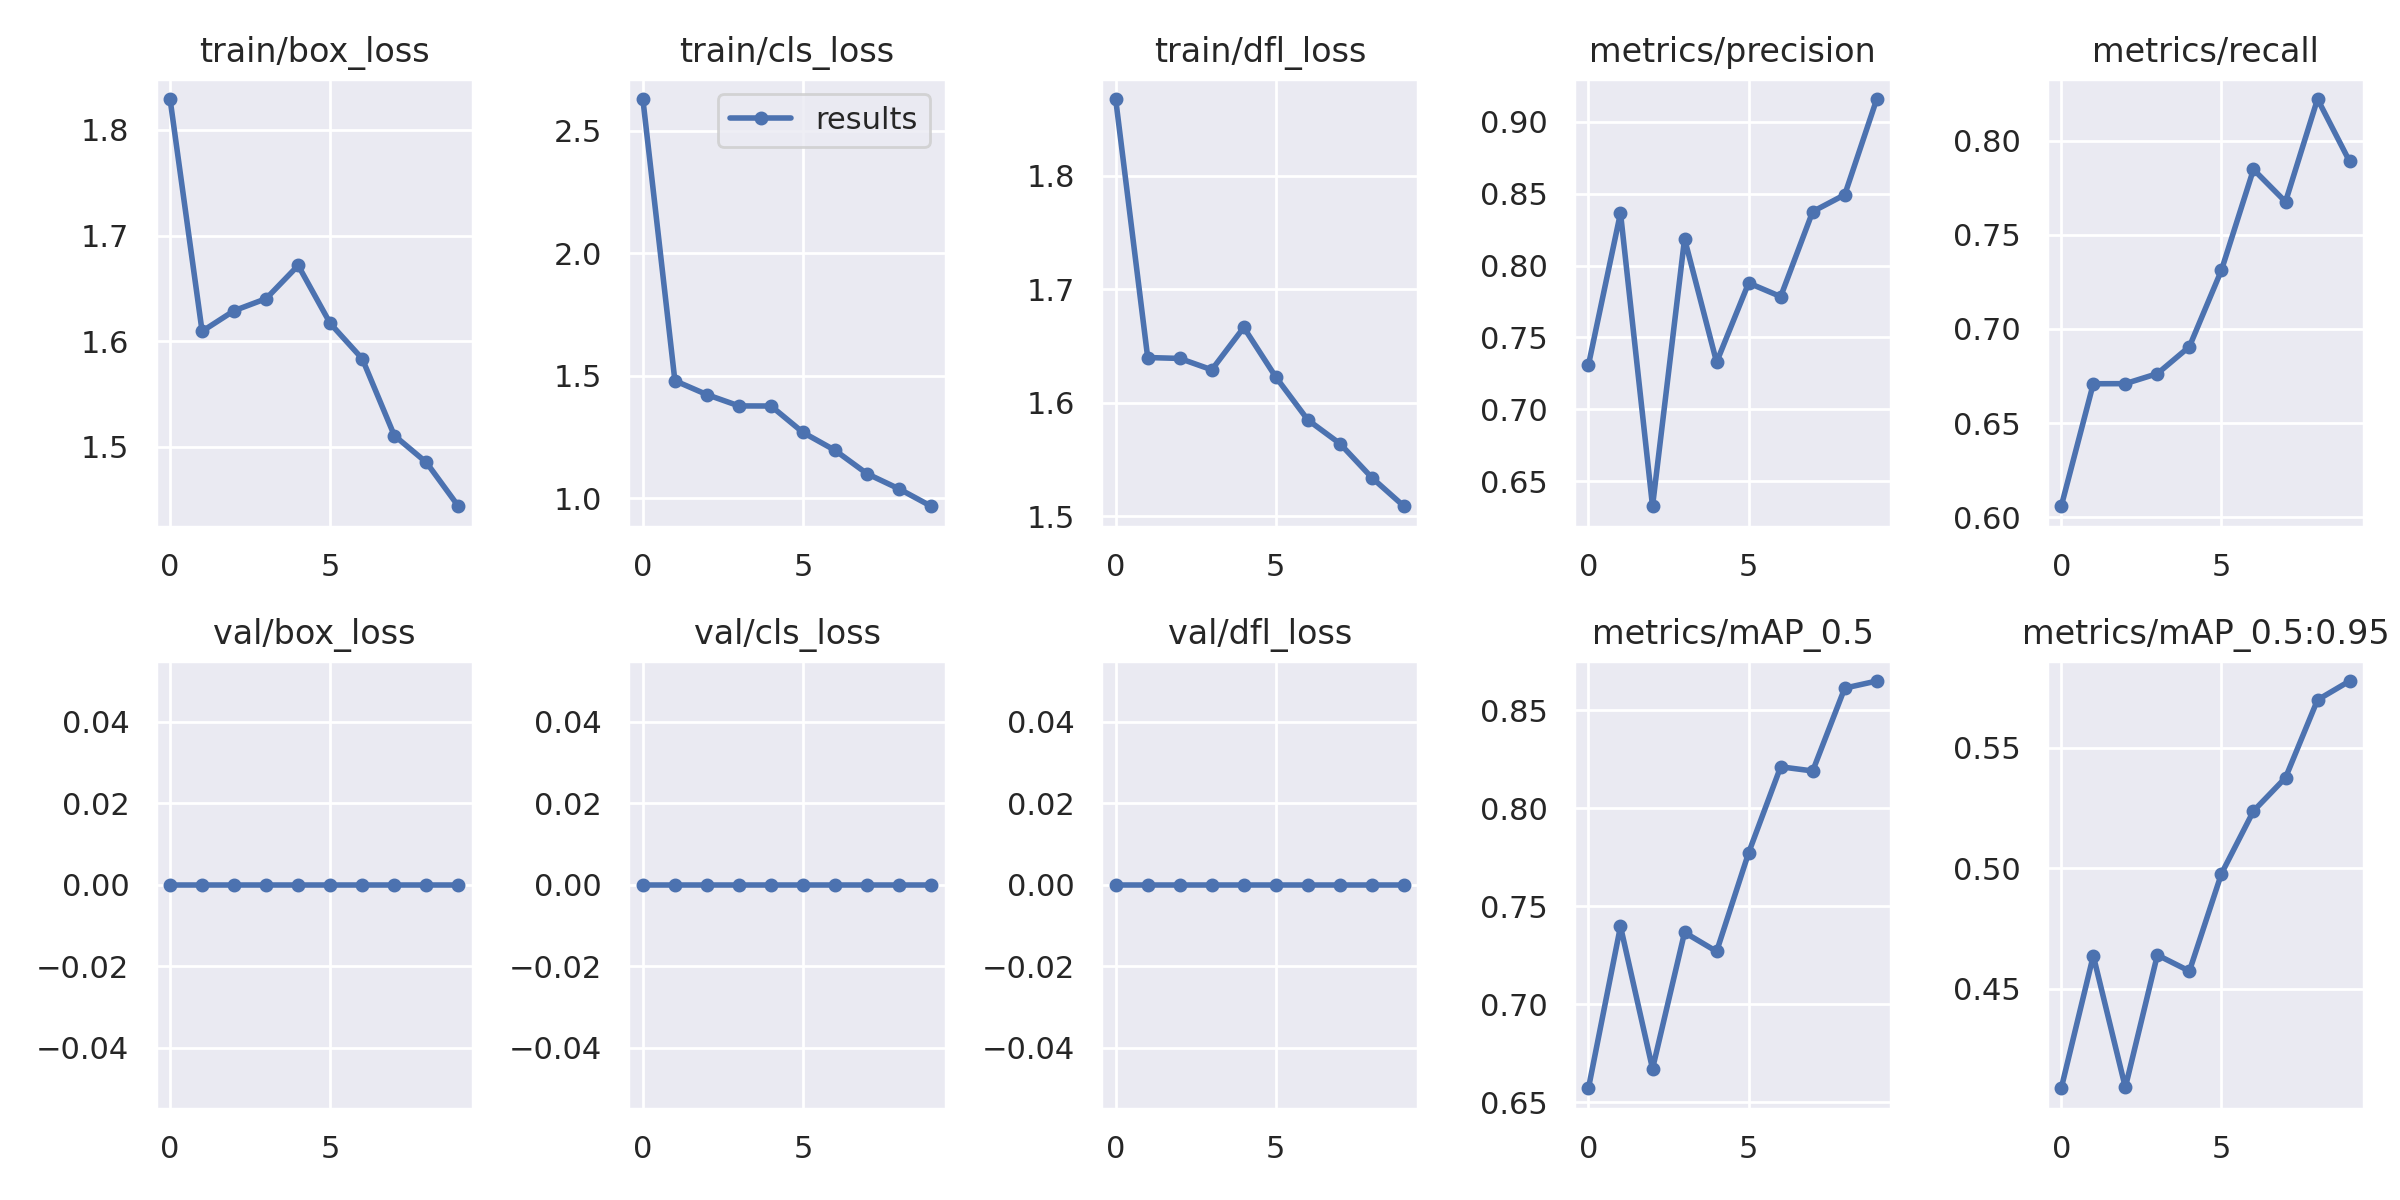

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning3/results.png", width=1000)

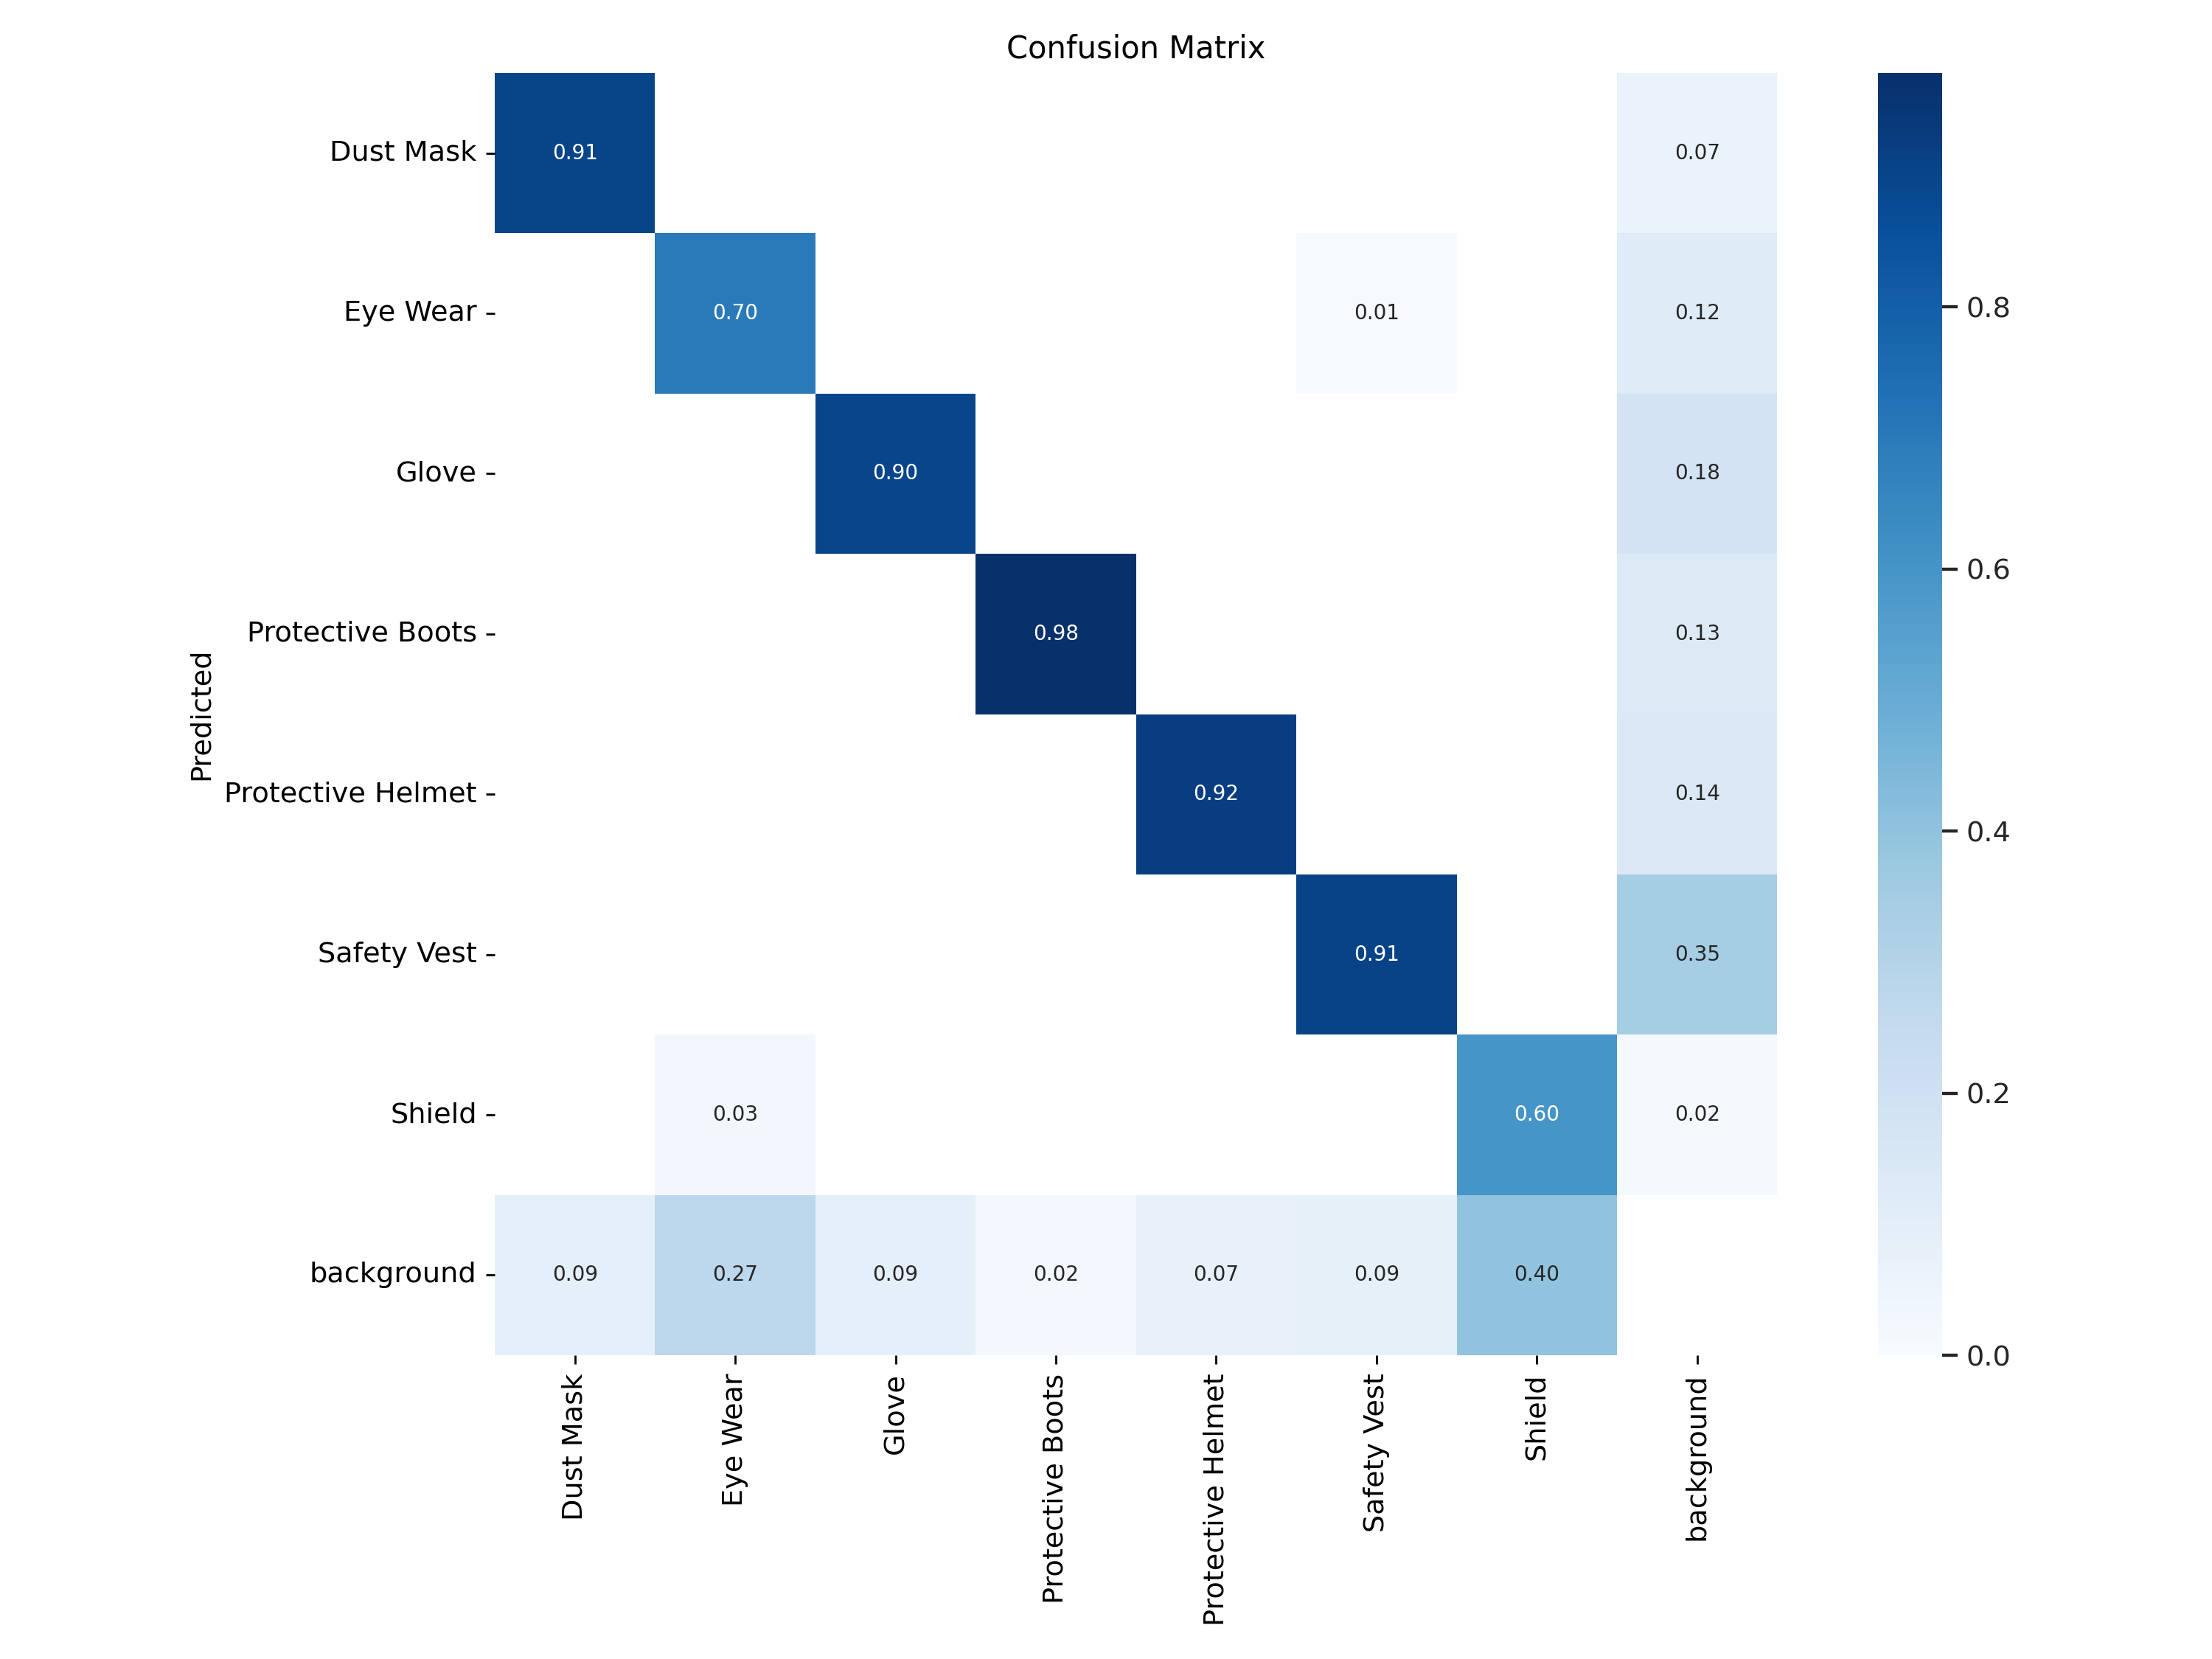

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning3/confusion_matrix.png", width=1000)

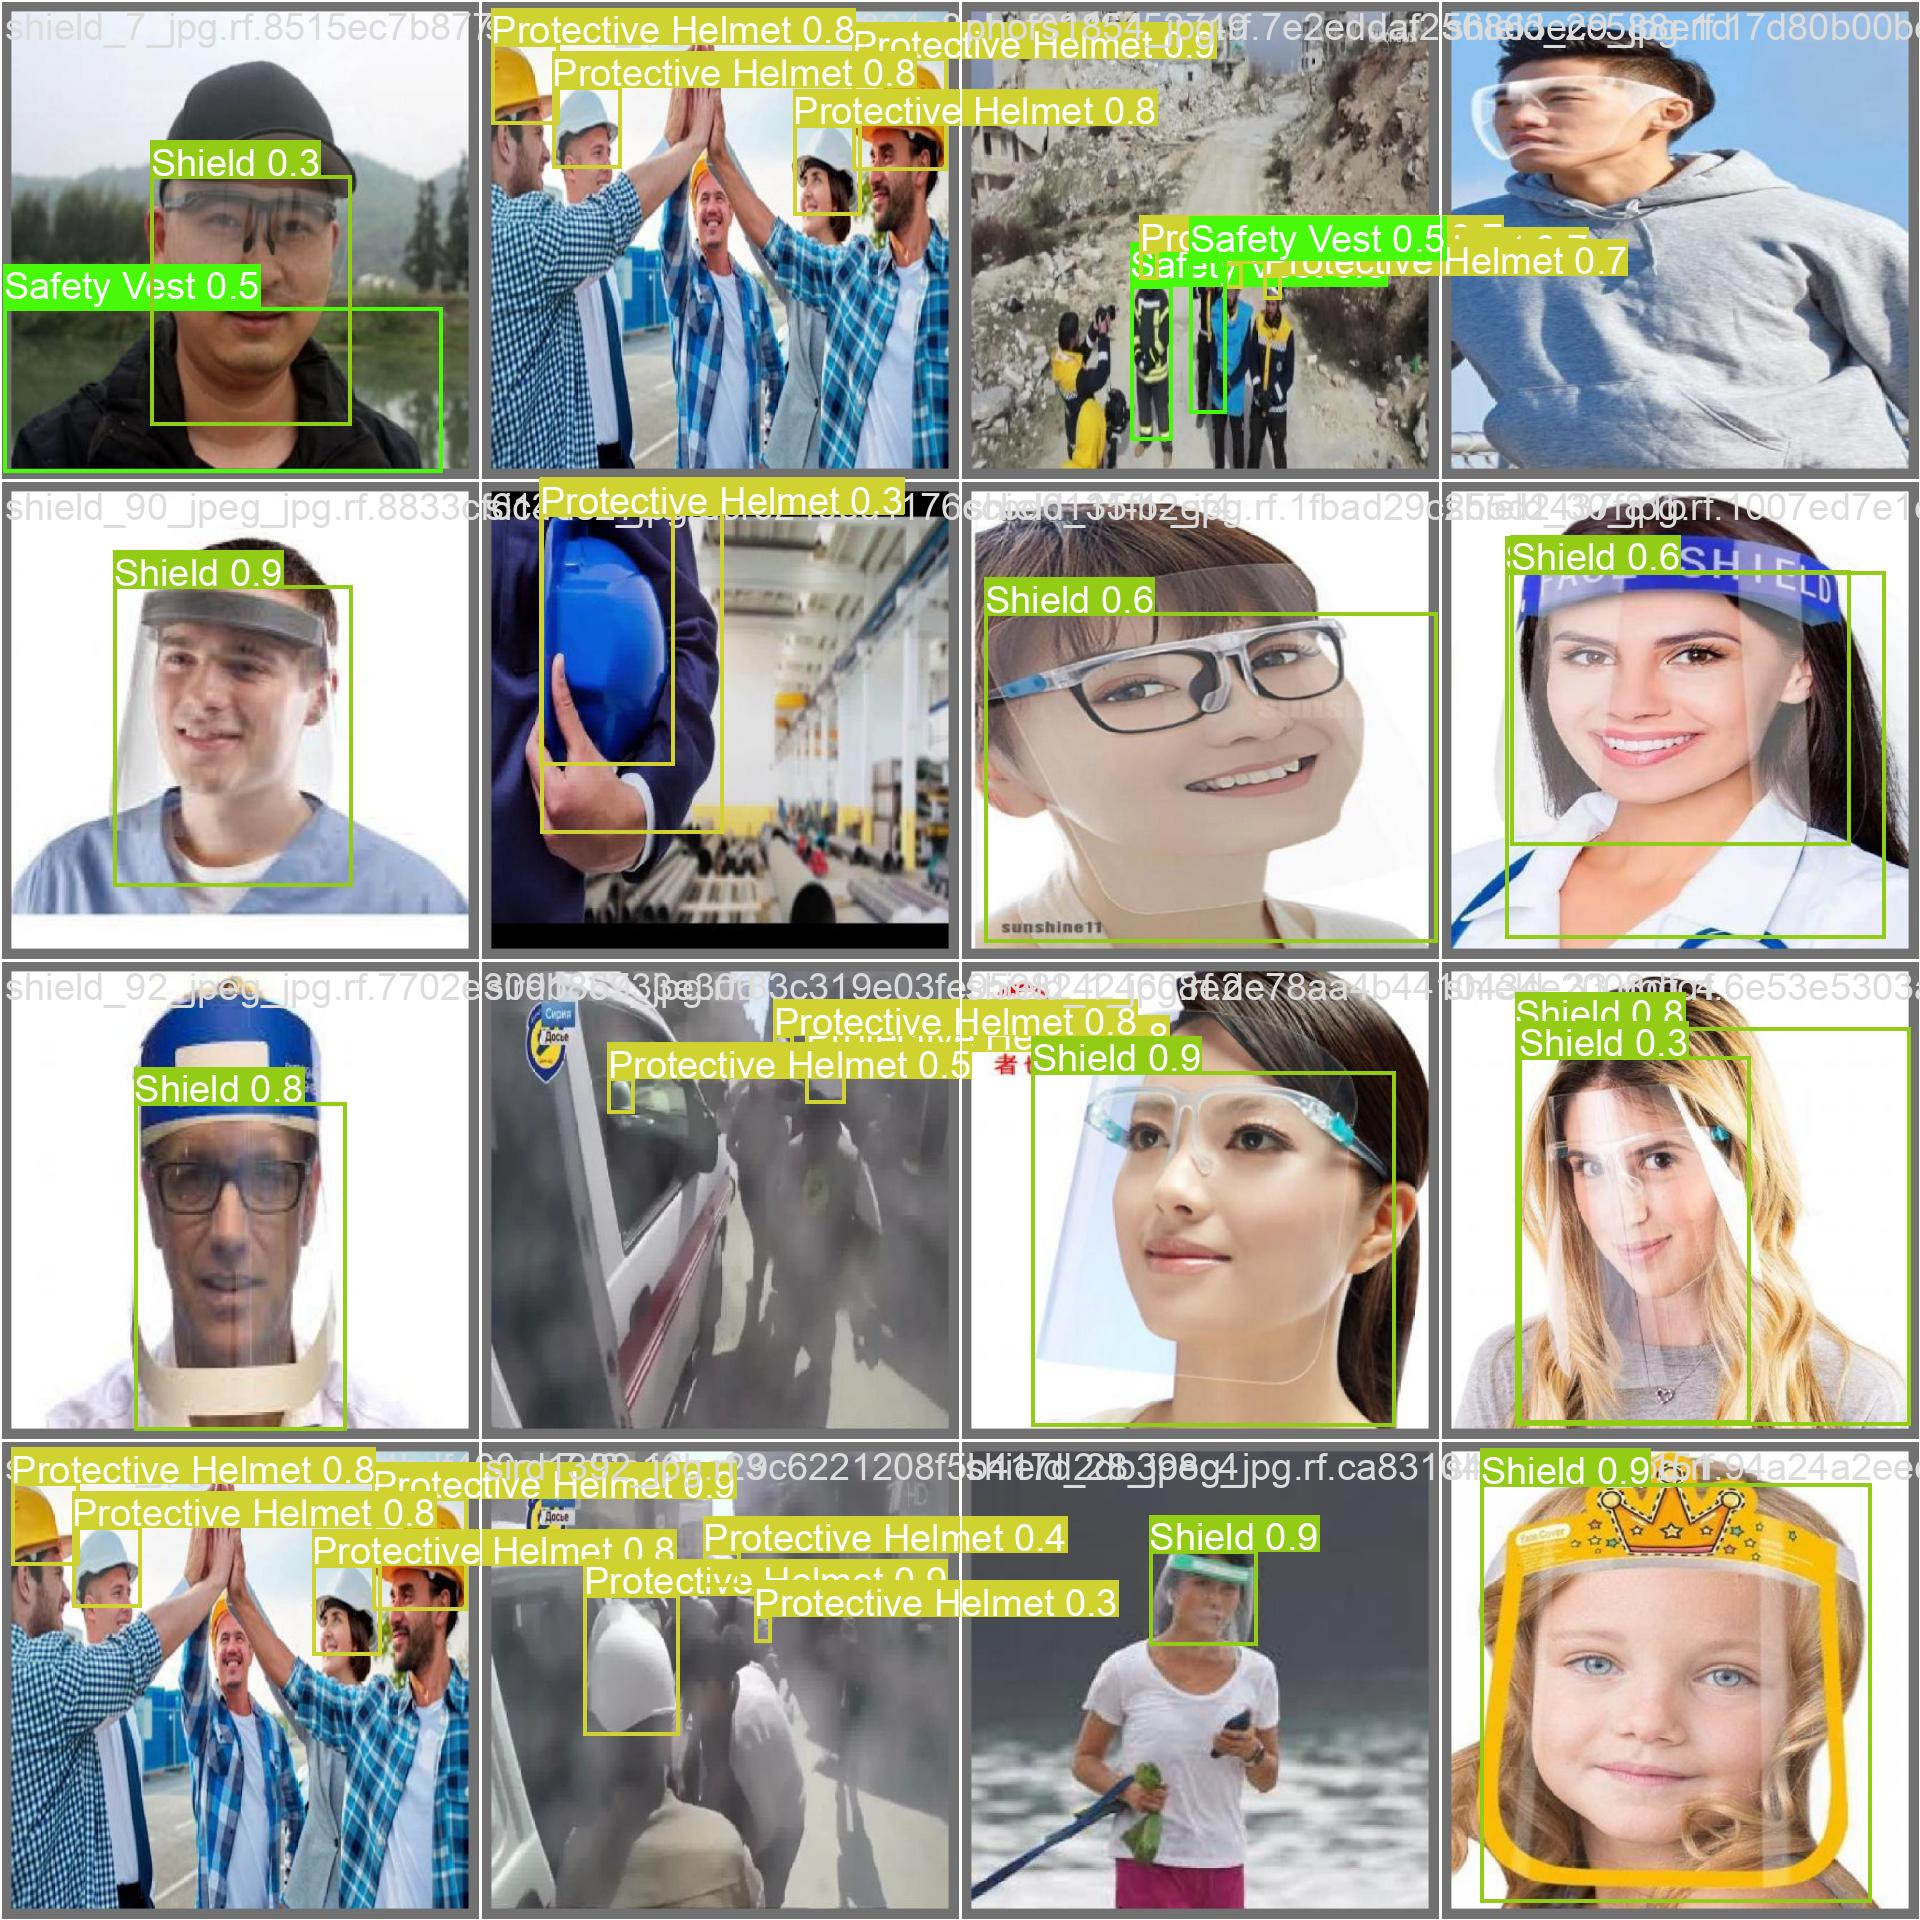

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning3/val_batch0_pred.jpg", width=1000)

#**Step 08: Validate Custom Model**

In [ ]:
# evaluate yolov9 models
!python val_dual.py --data 'PPE_Detection-2/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 --weights 'runs/train/yolov9-e-finetuning3/weights/best.pt' --save-json --name yolov9_ppe_c_640_val


val_dual: data=PPE_Detection-2/data.yaml, weights=['runs/train/yolov9-e-finetuning3/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
val: Scanning /content/yolov9/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 40/40 [00:15<00:00,  2.59it/s]
                   all        637       3064      0.916      0.789      0.865      0.577
             Dust Mask        637   

In [ ]:
# val_dual.py라는 스크립트를 실행합니다. 이 스크립트는 YOLOv9 모델의 검증(validation)을 위한 코드입니다.

# 파라미터 설명:

# --data 'PPE_Detection-2/data.yaml': 검증에 사용할 데이터셋의 구성 파일을 지정합니다. 이 파일에는 검증 데이터셋의 경로와 클래스 정보 등이 포함되어 있습니다.
# --img 640: 검증에 사용할 이미지의 크기를 640x640으로 설정합니다.
# --batch 16: 배치 크기를 16으로 설정합니다. 이는 한 번에 검증할 이미지의 수를 의미합니다.
# --conf 0.001: 모델의 예측에서 객체를 탐지할 때 사용할 신뢰도(confidence) 임계값을 0.001로 설정합니다. 신뢰도가 이 값보다 높은 객체만을 탐지합니다.
# --iou 0.7: Intersection over Union (IoU) 임계값을 0.7로 설정합니다. 이 값은 예측된 객체와 실제 객체의 겹침 정도를 평가할 때 사용됩니다.
# --device 0: 검증에 사용할 디바이스를 지정합니다. 여기서는 첫 번째 GPU(디바이스 0)를 사용합니다.
# --weights 'runs/train/yolov9-e-finetuning4/weights/best.pt': 검증에 사용할 학습된 모델의 가중치 파일을 지정합니다. 이 파일은 runs/train/yolov9-e-finetuning4/weights/ 디렉토리에 있는 best.pt 파일입니다.
# --save-json: 검증 결과를 JSON 파일로 저장합니다.
# --name yolov9_ppe_c_640_val: 검증 결과를 저장할 디렉토리 이름을 지정합니다. 여기서는 yolov9_ppe_c_640_val이라는 이름으로 저장됩니다.
# 요약하자면, 이 명령어는 YOLOv9 모델을 사용하여 지정된 데이터셋과 설정을 기반으로 학습된 모델의 성능을 검증하는 과정입니다. 설정된 파라미터들을 통해 모델의 검증 과정을 최적화하고, 검증 결과를 저장할 수 있습니다.

In [ ]:
# 초기 설정
# plaintext
# 코드 복사
# val_dual: data=PPE_Detection-2/data.yaml, weights=['runs/train/yolov9-e-finetuning3/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
# YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
# 검증 스크립트 val_dual.py의 설정 정보를 출력합니다. 주어진 파라미터 값들을 확인할 수 있습니다:
# 데이터 설정 파일: PPE_Detection-2/data.yaml
# 가중치 파일: runs/train/yolov9-e-finetuning3/weights/best.pt
# 배치 크기: 16
# 이미지 크기: 640x640
# 신뢰도 임계값: 0.001
# IoU 임계값: 0.7
# 디바이스: 0 (첫 번째 GPU)
# JSON 파일로 저장: True
# 결과 저장 경로: runs/val/yolov9_ppe_c_640_val
# 레이어 결합 및 모델 요약
# plaintext
# 코드 복사
# Fusing layers...
# yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
# 모델의 레이어를 결합하는 과정과 모델 요약 정보를 출력합니다. YOLOv9 모델의 레이어 수, 파라미터 수, GFLOPs 등을 확인할 수 있습니다.
# 검증 데이터 로드
# plaintext
# 코드 복사
# val: Scanning /content/yolov9/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
# 검증 데이터셋을 스캔하여 이미지 수와 유효성을 확인합니다. 637개의 이미지가 로드되었음을 알 수 있습니다.
# 검증 결과
# plaintext
# 코드 복사
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 40/40 [00:15<00:00,  2.59it/s]
#                    all        637       3064      0.916      0.789      0.865      0.577
#              Dust Mask        637        308      0.964      0.871      0.942      0.616
#               Eye Wear        637        147      0.918      0.653      0.759      0.405
#                  Glove        637        631      0.973      0.868       0.94      0.656
#       Protective Boots        637        608      0.981      0.932      0.987      0.683
#      Protective Helmet        637        753      0.964      0.881      0.968      0.717
#            Safety Vest        637        592      0.905       0.84      0.917       0.69
#                 Shield        637         25      0.708       0.48      0.544      0.275
# 각 클래스별 검증 결과를 출력합니다. 정확도(P), 재현율(R), mAP50, mAP50-95 값을 확인할 수 있습니다.
# 전체(all) 클래스에 대해:
# 정확도(P): 0.916
# 재현율(R): 0.789
# mAP50: 0.865
# mAP50-95: 0.577
# 각 개별 클래스(Dust Mask, Eye Wear, Glove, Protective Boots, Protective Helmet, Safety Vest, Shield)에 대한 성능 지표도 각각 출력됩니다.
# 속도 측정
# plaintext
# 코드 복사
# Speed: 0.2ms pre-process, 13.6ms inference, 3.4ms NMS per image at shape (16, 3, 640, 640)
# 검증 과정에서 이미지 전처리, 추론, NMS(Non-Maximum Suppression) 속도를 측정한 결과입니다.
# mAP 계산 및 저장
# plaintext
# 코드 복사
# Evaluating pycocotools mAP... saving runs/val/yolov9_ppe_c_640_val2/best_predictions.json...
# loading annotations into memory...
# pycocotools unable to run: [Errno 2] No such file or directory: '/content/yolov9/annotations/instances_val2017.json'
# Results saved to runs/val/yolov9_ppe_c_640_val2
# pycocotools를 사용하여 mAP를 계산하려고 시도하지만, COCO 형식의 어노테이션 파일을 찾지 못해 실패합니다. 해당 파일이 존재하지 않음을 알리는 오류 메시지가 출력됩니다.
# 검증 결과가 runs/val/yolov9_ppe_c_640_val2 디렉토리에 저장되었음을 알립니다.
# 이 전체 출력은 YOLOv9 모델을 사용하여 검증을 수행하고 그 결과를 보여줍니다. 각 클래스별 성능 지표를 확인하고, 모델의 속도와 효율성을 평가할 수 있습니다.

#**Step 09: Download the Demo Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/yolov9/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 17.6MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/yolov9/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 16.4MB/s]


#**Step 10: Inference on Image**

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Detection-2/valid/images/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg' --img 640 --device 0 --weights 'best.pt' --name yolov9_c_ppe_640_detect


detect_dual: weights=['best.pt'], source=PPE_Detection-2/valid/images/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
image 1/1 /content/yolov9/PPE_Detection-2/valid/images/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg: 640x640 1 Protective Helmet, 1 Safety Vest, 31.3ms
Speed: 0.5ms pre-process, 31.3ms inference, 555.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/det

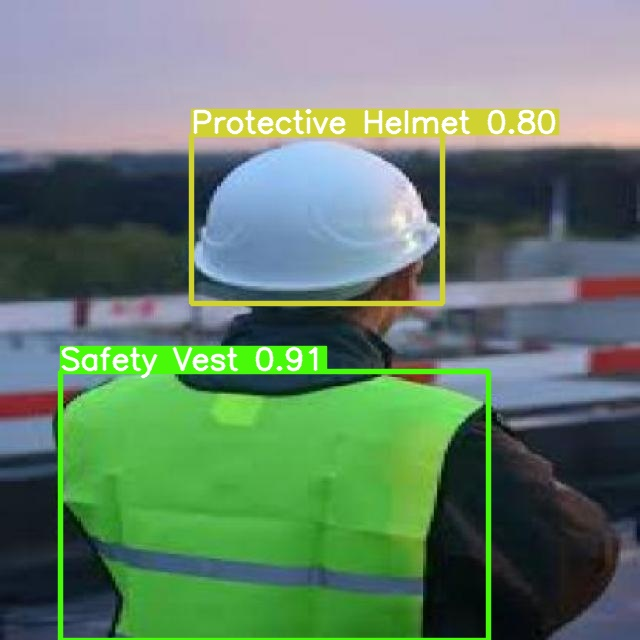

In [ ]:
Image(filename=f"{HOME}/runs/detect/yolov9_c_ppe_640_detect/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg")

#**Step 11: Inference on Video**

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Part1.mp4' --img 640 --device 0 --weights 'best.pt' --name yolov9_ppe_640_detect


detect_dual: weights=['best.pt'], source=PPE_Part1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
video 1/1 (1/310) /content/yolov9/PPE_Part1.mp4: 384x640 2 Protective Helmets, 5 Safety Vests, 222.1ms
video 1/1 (2/310) /content/yolov9/PPE_Part1.mp4: 384x640 2 Protective Helmets, 5 Safety Vests, 33.1ms
video 1/1 (3/310) /content/yolov9/PPE_Part1.mp4: 384x640 2 Protective Helmets, 5 Safety Vests, 32.7ms
video 1/1 (4/310) /content/y

#**Display the Output Video**

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/yolov9_ppe_640_detect/PPE_Part1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Part2.mp4' --img 640 --device 0 --weights 'best.pt' --name yolov9_ppe_640_detect2


detect_dual: weights=['best.pt'], source=PPE_Part2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_ppe_640_detect2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
video 1/1 (1/267) /content/yolov9/PPE_Part2.mp4: 384x640 (no detections), 219.5ms
video 1/1 (2/267) /content/yolov9/PPE_Part2.mp4: 384x640 1 Protective Helmet, 2 Safety Vests, 32.7ms
video 1/1 (3/267) /content/yolov9/PPE_Part2.mp4: 384x640 1 Protective Helmet, 2 Safety Vests, 32.3ms
video 1/1 (4/267) /content/yolov9/PPE_Part2.mp4: 3

#**Display the Output Video**

In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/yolov9_ppe_640_detect2/PPE_Part2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.